In [1]:
import numpy as np
import cpnest.model
import corner
import pandas as pd
import matplotlib.pyplot as plt

Checkpoint exception raise


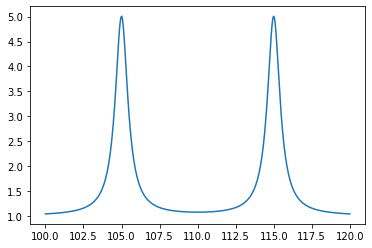

In [42]:
npts = 400
f = np.linspace(100, 120, npts)
nu = [105.0, 115.0]
height = 1.0
lw = 1.0
lim = height / ((lw/2.0)**2 + (nu[0] - f)**2) + 1.0
lim += height / ((lw/2.0)**2 + (nu[1] - f)**2)

plt.plot(f, lim)

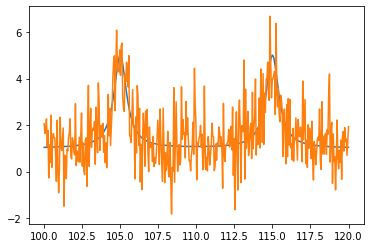

In [43]:
p = lim + np.random.randn(npts)

plt.plot(f, lim)
plt.plot(f, p)

In [44]:
class SimpleModel(cpnest.model.Model):
    """
    A simple Lorentzian model
    """
    names=['nu', 'h', 'lw']
    bounds=[[100,120],[0, 100], [0,10]]
    
    def set_frequency(self, f):
        self.f = f
        
    def set_power(self, p):
        self.p = p
    
    def model(self, param):
        return param['h'] / ((param['lw']/2.0)**2 + (param['nu'] - self.f)**2) + 1.0
    
    def log_likelihood(self, param):
        resid = self.model(param) - self.p
        return np.sum(-0.5*(resid**2) - np.log(2.0*np.pi))
    
    def log_prior(self,p):
        if not self.in_bounds(p): return -np.inf
        return 0.0

In [45]:
%%time
mymodel = SimpleModel()
mymodel.set_frequency(f)
mymodel.set_power(p)
nest = cpnest.CPNest(mymodel, seed=54, nthreads=4, nlive=1000, maxmcmc=100, 
                     poolsize=100)
nest.run()

2020-03-17, 16:30:33 - CPNest  : Running with 4 parallel threads
2020-03-17, 16:30:49 - CPNest  : Sampler process 14422: MCMC samples accumulated = 0
2020-03-17, 16:30:49 - CPNest  : Sampler process 14421: MCMC samples accumulated = 0
2020-03-17, 16:30:49 - CPNest  : Sampler process 14420: MCMC samples accumulated = 0
2020-03-17, 16:30:49 - CPNest  : Sampler process 14419: MCMC samples accumulated = 0
2020-03-17, 16:30:49 - CPNest  : Sampler process 14422 - mean acceptance 0.342: exiting
2020-03-17, 16:30:49 - CPNest  : Sampler process 14420 - mean acceptance 0.231: exiting
2020-03-17, 16:30:49 - CPNest  : Sampler process 14421 - mean acceptance 0.353: exiting
2020-03-17, 16:30:49 - CPNest  : Sampler process 14419 - mean acceptance 0.350: exiting
2020-03-17, 16:30:50 - CPNest  : Final evidence: -1078.58
2020-03-17, 16:30:50 - CPNest  : Information: 13.80
2020-03-17, 16:30:51 - CPNest  : Computed log_evidences: (-1078.5878748316645,)
2020-03-17, 16:30:51 - CPNest  : Relative weights of 

CPU times: user 4.62 s, sys: 324 ms, total: 4.95 s
Wall time: 18.2 s


In [46]:
import pandas as pd
df = pd.DataFrame(nest.get_posterior_samples())
df.head()

2020-03-17, 16:30:53 - CPNest  : Computed log_evidences: (-1078.5878748316645,)
2020-03-17, 16:30:53 - CPNest  : Relative weights of input files: [1.0]
2020-03-17, 16:30:53 - CPNest  : Relative weights of input files taking into account their length: [1.0]
2020-03-17, 16:30:53 - CPNest  : Number of input samples: [18776]
2020-03-17, 16:30:53 - CPNest  : Expected number of samples from each input file [3296]
2020-03-17, 16:30:53 - CPNest  : Samples produced: 3296


,nu,h,lw,logL,logPrior
0,114.828415,1.702418,1.467025,-1078.050362,0.0
1,104.988020,2.781255,1.936939,-1073.732108,0.0
2,105.042065,2.722805,1.919199,-1073.515117,0.0
3,105.179874,1.918367,1.438661,-1073.337553,0.0
4,104.997035,2.553002,1.706526,-1072.896658,0.0


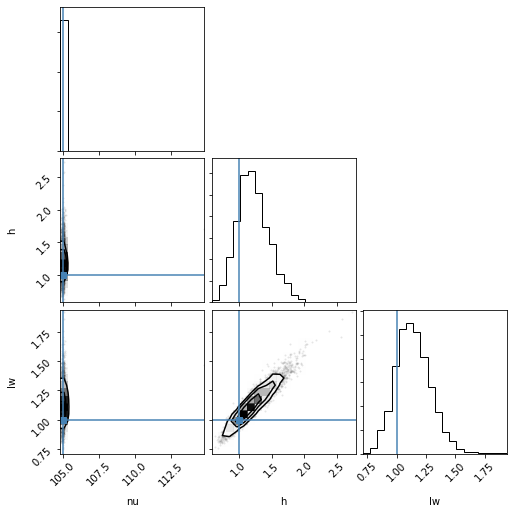

In [47]:
import corner 
corner.corner(df[['nu', 'h', 'lw']], truths=[nu[0], height, lw]);